# Contents 
1. Importing libraries and data
2. Data cleaning
3. Data prep for regression analysis
4. Regression analysis

## Importing libraries and data

In [152]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [153]:
# This will ensure that the graphs I create are displayed within the notebook without the need to "call" them specifically.
%matplotlib inline

In [154]:
path = r'C:\Users\TemporaryAdmin\Desktop\yoana_learning\Data Analytics\Immension\tasks\my_tasks\part_6\02_data\prepared_data'

In [155]:
df = pd.read_csv(os.path.join(path, 'agricultural_methane_emissions_years_final_new.csv'))

## Data cleaning

In [156]:
df.columns

Index(['Unnamed: 0', 'Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
       ...
       'Post-demographic dividend', 'Pre-demographic dividend', 'Small states',
       'South Asia', 'South Asia (IDA & IBRD)', 'Sub-Saharan Africa',
       'Sub-Saharan Africa (excluding high income)',
       'Sub-Saharan Africa (IDA & IBRD countries)', 'Upper middle income',
       'World'],
      dtype='object', length=224)

In [157]:
df.head(20)

,Unnamed: 0,Afghanistan,Albania,Algeria,Angola,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,...,Post-demographic dividend,Pre-demographic dividend,Small states,South Asia,South Asia (IDA & IBRD),Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Sub-Saharan Africa (IDA & IBRD countries),Upper middle income,World
0,1971,7819.39,948.33,2267.04,8003.67,13.55,71391.92,1017.12,71299.39,4790.85,...,643214.54,203167.89,16282.50,462081.02,462081.02,251448.90,251446.39,251448.90,1163422.42,2840961.47
1,1972,6672.29,930.32,2302.15,8901.30,13.47,74545.78,1047.96,78476.61,4760.50,...,654075.80,206064.10,16770.15,459594.90,459594.90,256212.48,256209.65,256212.48,1182836.11,2871562.42
2,1973,6960.20,960.89,2260.93,9776.05,13.23,77497.37,1067.61,71135.55,4810.32,...,654901.52,217738.87,17474.05,466486.88,466486.88,270082.52,270079.60,270082.52,1194238.39,2911944.73
3,1974,7378.03,985.79,2352.50,8063.48,12.83,77495.49,1099.75,75657.35,4945.58,...,674127.91,188037.33,17748.55,468547.08,468547.08,238223.69,238220.58,238223.69,1208394.15,2915398.22
4,1975,7836.13,1001.59,2512.39,10215.46,12.78,79162.96,1129.59,81516.08,4934.70,...,683966.76,210797.27,18043.21,477161.86,477161.86,261745.93,261742.64,261745.93,1229920.65,2979621.95
5,1976,7954.05,1062.28,2459.48,8601.50,12.80,81324.55,1130.86,86607.28,4891.35,...,683092.77,206048.57,17575.70,474672.77,474672.77,256464.56,256461.25,256464.56,1253881.16,2992540.36
6,1977,7781.35,1100.96,2696.95,10360.98,12.91,84699.39,1134.36,81711.86,4949.29,...,675178.55,232401.61,19022.06,484468.07,484468.07,286659.49,286656.40,286659.49,1248804.65,3022537.34
7,1978,7719.37,1168.09,2841.67,11075.28,15.49,80597.94,1156.88,72367.10,4994.43,...,664422.25,227305.46,18907.18,491679.26,491679.26,279801.49,279798.19,279801.49,1232434.36,3002825.73
8,1979,7541.71,1217.13,3133.01,15643.85,19.38,79536.52,1171.21,75951.25,5103.54,...,666747.41,266375.09,20035.06,492598.82,492598.82,322525.75,322522.27,322525.75,1229392.08,3039479.46
9,1980,7450.50,1257.07,3280.73,12320.03,22.06,78082.19,1179.23,77142.66,5075.16,...,675399.72,266210.45,19584.57,491552.94,491552.94,322252.14,322248.46,322252.14,1243881.18,3072596.43


In [158]:
df.shape

(48, 224)

In [159]:
# checking if the data types are correct.
df.dtypes

Unnamed: 0                                      int64
Afghanistan                                   float64
Albania                                       float64
Algeria                                       float64
Angola                                        float64
                                               ...   
Sub-Saharan Africa                            float64
Sub-Saharan Africa (excluding high income)    float64
Sub-Saharan Africa (IDA & IBRD countries)     float64
Upper middle income                           float64
World                                         float64
Length: 224, dtype: object

In [160]:
# Renaming the unnamed column to year.
df.rename(columns = {'Unnamed: 0' : 'Year'}, inplace = True)

In [161]:
# Checking for missing values

df.isnull().sum()

Year                                          0
Afghanistan                                   0
Albania                                       0
Algeria                                       0
Angola                                        0
                                             ..
Sub-Saharan Africa                            0
Sub-Saharan Africa (excluding high income)    0
Sub-Saharan Africa (IDA & IBRD countries)     0
Upper middle income                           0
World                                         0
Length: 224, dtype: int64

No missing values to handle.

In [165]:
# Checking for duplicates.
dups = df.duplicated()

In [166]:
dups.shape 

(48,)

No duplicates to address.

In [167]:
# Getting a list of all the column names
print(list(df.columns))

['Year', 'Afghanistan', 'Albania', 'Algeria', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas, The', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cabo Verde', 'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic', 'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt, Arab Rep.', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia, The', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran, I

<AxesSubplot:xlabel='High income', ylabel='Density'>

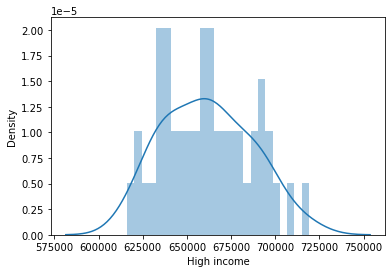

In [168]:
# Checking for extreme values
sns.distplot(df['High income'], bins=25) 

<AxesSubplot:xlabel='Low income', ylabel='Density'>

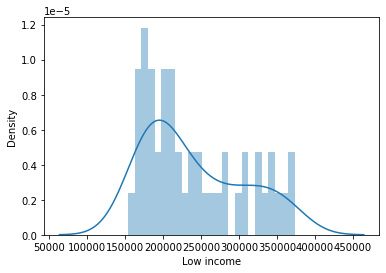

In [169]:
# Checking for extreme values
sns.distplot(df['Low income'], bins=25)

<AxesSubplot:xlabel='Euro area', ylabel='Density'>

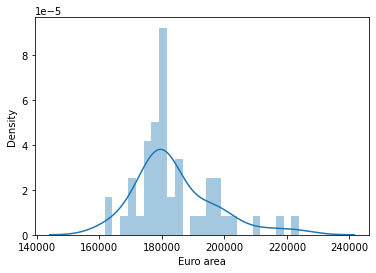

In [170]:
# Checking for extreme values
sns.distplot(df['Euro area'], bins=25)

<AxesSubplot:xlabel='Heavily indebted poor countries (HIPC)', ylabel='Density'>

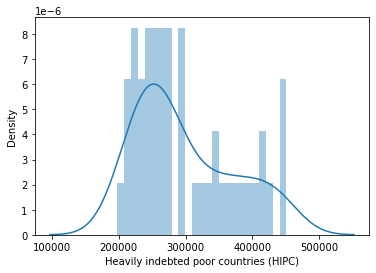

In [171]:
# Checking for extreme values
sns.distplot(df['Heavily indebted poor countries (HIPC)'], bins=25)

<AxesSubplot:xlabel='Least developed countries: UN classification', ylabel='Density'>

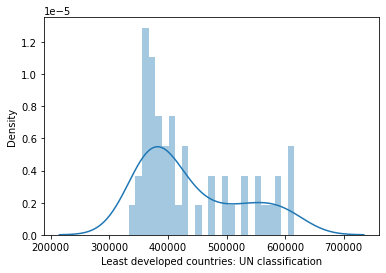

In [172]:
# Checking for extreme values
sns.distplot(df['Least developed countries: UN classification'], bins=25)

<AxesSubplot:xlabel='European Union', ylabel='Density'>

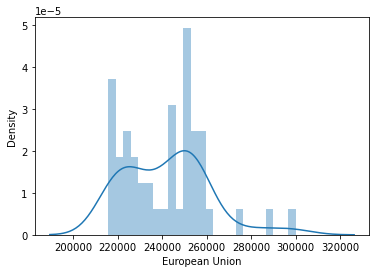

In [173]:
# Checking for extreme values
sns.distplot(df['European Union'], bins=25)

<AxesSubplot:xlabel='World', ylabel='Density'>

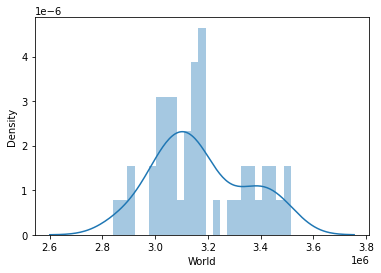

In [174]:
# Checking for extreme values
sns.distplot(df['World'], bins=25)

In [175]:
# Checking the mean
df['European Union'].mean()

241831.135625

In [176]:
# Checking the mean
df['Least developed countries: UN classification'].mean()

439262.870625

In [177]:
# Checking the mean
df['Heavily indebted poor countries (HIPC)'].mean()

298538.07833333337

In [178]:
# Checking the median
df['European Union'].median()

243199.29

In [179]:
# Checking the median
df['Least developed countries: UN classification'].median()

406136.325

In [180]:
# Checking the median
df['Heavily indebted poor countries (HIPC)'].median()

270994.71499999997

In [181]:
# Checking the maximum
df['European Union'].max()

300160.0

In [182]:
# Checking the maximum
df['Least developed countries: UN classification'].max()

615960.0

In [183]:
# Checking the maximum
df['Heavily indebted poor countries (HIPC)'].max()

450790.0

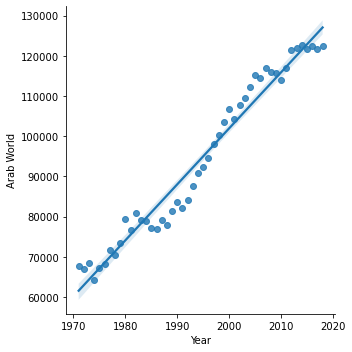

In [184]:
# Scatterplot
sns.lmplot(x = 'Year', y = 'Arab World', data = df)

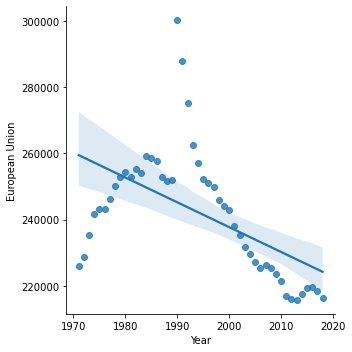

In [185]:
# Scatterplot
sns.lmplot(x = 'Year', y = 'European Union', data = df)

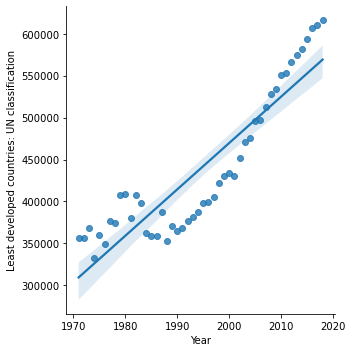

In [186]:
# Scatterplot
sns.lmplot(x = 'Year', y = 'Least developed countries: UN classification', data = df)

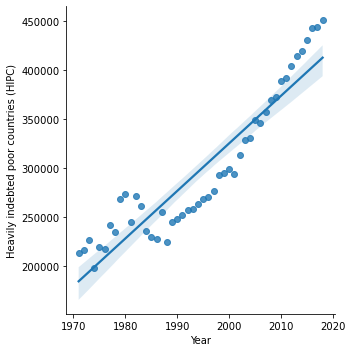

In [187]:
# Scatterplot
sns.lmplot(x = 'Year', y = 'Heavily indebted poor countries (HIPC)', data = df)

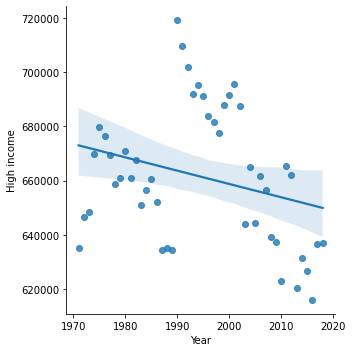

In [188]:
# Scatterplot
sns.lmplot(x = 'Year', y = 'High income', data = df)

Having looked at my dataset after being introduced to the regression analysis topic, I realised that up until now I was not putting any focus on the 'Year' datapoint. Having checked the relationship between the year and some of the other datapoints from my set, I would be very interested now to test the regression model using the year as a constant variable.

NULL HYPOTHESIS: The polution in the Economically more developed countries (countries with higher incomes and which are not part of the developing world) has been increasing over time. 

Alternative Hypothesis: The polution in the Economically more developed countries (countries with higher incomes and which are not part of the developing world) has been decreasing over time. 

## Data prep for regression analysis 

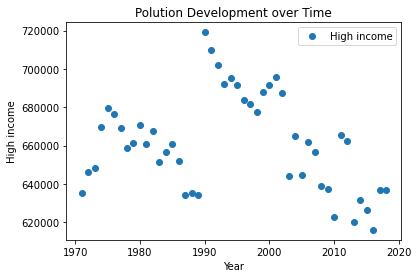

In [189]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.

df.plot(x = 'Year', y='High income',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('High income')  
plt.show() 

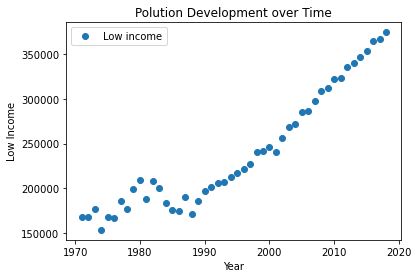

In [190]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year', y='Low income',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('Low Income')  
plt.show() 

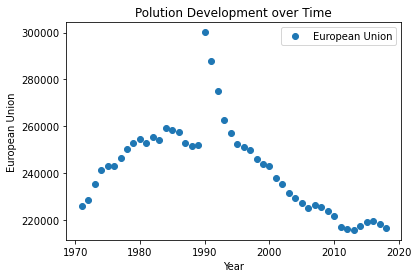

In [191]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year', y='European Union',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('European Union')  
plt.show()

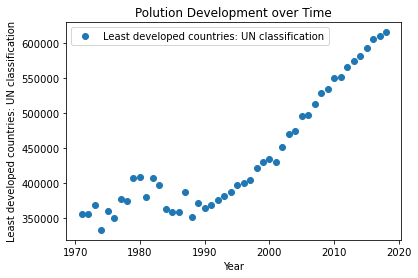

In [192]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year', y='Least developed countries: UN classification',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('Least developed countries: UN classification')  
plt.show()

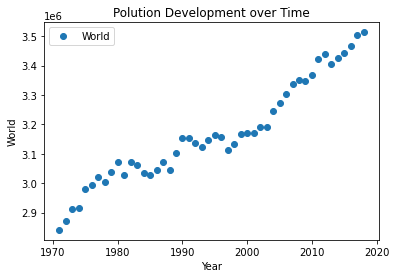

In [193]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year', y='World',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('World')  
plt.show()

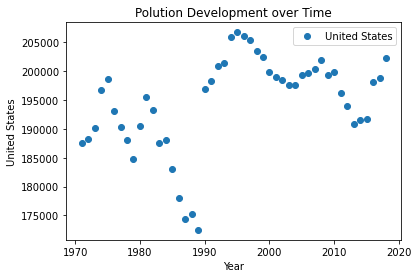

In [194]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year', y= 'United States',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('United States')  
plt.show()

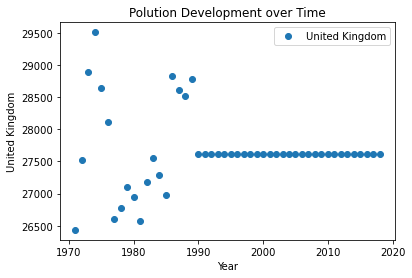

In [195]:
# Creating a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
df.plot(x = 'Year', y= 'United Kingdom',style='o') # The style option creates a scatterplot; without it, we only have lines.
plt.title('Polution Development over Time')  
plt.xlabel('Year')  
plt.ylabel('United Kingdom')  
plt.show()

In [196]:
# Reshaping the variables into NumPy arrays and put them into separate objects.
X = df['Year'].values.reshape(-1,1)
y = df['High income'].values.reshape(-1,1)

In [197]:
X

array([[1971],
       [1972],
       [1973],
       [1974],
       [1975],
       [1976],
       [1977],
       [1978],
       [1979],
       [1980],
       [1981],
       [1982],
       [1983],
       [1984],
       [1985],
       [1986],
       [1987],
       [1988],
       [1989],
       [1990],
       [1991],
       [1992],
       [1993],
       [1994],
       [1995],
       [1996],
       [1997],
       [1998],
       [1999],
       [2000],
       [2001],
       [2002],
       [2003],
       [2004],
       [2005],
       [2006],
       [2007],
       [2008],
       [2009],
       [2010],
       [2011],
       [2012],
       [2013],
       [2014],
       [2015],
       [2016],
       [2017],
       [2018]], dtype=int64)

In [198]:
y

array([[635348.37],
       [646471.18],
       [648492.7 ],
       [669820.7 ],
       [679776.34],
       [676391.9 ],
       [669379.93],
       [658641.43],
       [661117.71],
       [670901.99],
       [661095.58],
       [667655.07],
       [651208.08],
       [656564.53],
       [660722.78],
       [652142.38],
       [634436.11],
       [635112.83],
       [634437.59],
       [719110.  ],
       [709640.  ],
       [701860.  ],
       [692000.  ],
       [695320.  ],
       [691360.  ],
       [683670.  ],
       [681490.  ],
       [677470.  ],
       [687920.  ],
       [691730.  ],
       [695540.  ],
       [687650.  ],
       [644100.  ],
       [664860.  ],
       [644560.  ],
       [661750.  ],
       [656440.  ],
       [639160.  ],
       [637310.  ],
       [622840.  ],
       [665310.  ],
       [662240.  ],
       [620250.  ],
       [631540.  ],
       [626700.  ],
       [616060.  ],
       [636740.  ],
       [636990.  ]])

In [199]:
# Splitting data into a training set and a test set.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [205]:
# Creating a regression object.
regression = LinearRegression() 

In [206]:
# Fitting the regression object onto the training set.
regression.fit(X_train, y_train)

LinearRegression()

In [207]:
# Predicting the values of y using X.
y_predicted = regression.predict(X_test)

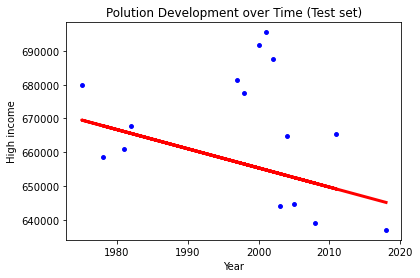

In [208]:
# Creating a plot that shows the regression line from the model on the test set.
plot_test = plt
plot_test.scatter(X_test, y_test, color='blue', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Polution Development over Time (Test set)')
plot_test.xlabel('Year')
plot_test.ylabel('High income')
plot_test.show()

In [209]:
# Creating objects that contain the model summary statistics.
rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [210]:
# Printing the model summary statistics. This is where you evaluate the performance of the model.
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-567.52583582]]
Mean squared error:  407845166.17163235
R2 score:  -0.18877595154682436


In [211]:
y_predicted

array([[655347.58834145],
       [669535.73423706],
       [657050.16584892],
       [654780.06250563],
       [653645.01083398],
       [650807.38165486],
       [652509.95916233],
       [649104.80414738],
       [667833.15672959],
       [666130.57922211],
       [665563.05338629],
       [654212.5366698 ],
       [653077.48499815],
       [656482.6400131 ],
       [645132.12329661]])

In [212]:
# Creating a dataframe comparing the actual and predicted values of y.
data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,691730.00,655347.588341
1,679776.34,669535.734237
2,681490.00,657050.165849
3,695540.00,654780.062506
4,644100.00,653645.010834
5,639160.00,650807.381655
6,644560.00,652509.959162
7,665310.00,649104.804147
8,658641.43,667833.156730
9,661095.58,666130.579222


## Compare how the regression fits the training set

In [213]:
# Predicting.
y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [214]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [215]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-567.52583582]]
Mean squared error:  653930529.2187383
R2 score:  0.09129776476259532


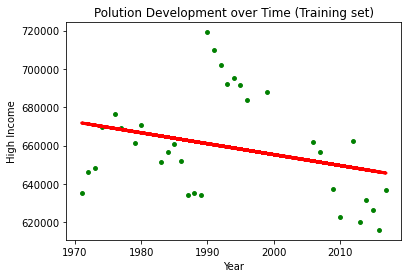

In [216]:
# Visualizing the training set results.
plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Polution Development over Time (Training set)')
plot_test.xlabel('Year')
plot_test.ylabel('High Income')
plot_test.show()

The lines both in my Test set and in my Training set are not covering my data points. The data shows to have a lot of outliers, which for something being measured, such as polution levels cannot be removed from the equation. 

Looking at the slopes for both the test and the training sets, their slopes are negative-  as X rises (as the x rises- the years pass by), y drops (the polution level in high income countries). 

The root mean squared error (MSE) is an estimator that measures the average of the squared difference between the estimated values and the true values. It tells us how close a regression line is to a set of points (i.e., its accuracy). It does so by taking the distances from the points to the regression line and squaring them. The larger the distance, the farther away the regression line is from the data points, indicating that the regression line isn’t an accurate representation of the data. A small MSE, however, means that the regression line passes fairly close to the observations, making it a good fit. For both our training and test sets, the MSEs are quite large hense the regression my not be the most accurate representation of my data.

R2 score or R squared, which is a metric that tells us how well the model explains the variance in the data. It’s a number (usually) between 0 and 1, where values closer to 0 indicate a poor fit, and values closer to 1 indicate a good fit. It can also take a negative value if the model fits worse than a horizontal line. Since my values (-0.19 for te test set and  0.09 for the training set are very far from the 100%- it would be another sign that my model is not suitable for this analysis. 